In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from beakerx import *

### Import data

In [2]:
DATADIR = os.path.join(os.getenv("DATA_DIR"), 'processed_journey')
DATADIR

'/Volumes/GoogleDrive/Team Drives/GOV.UK teams/2018-2019/Q3/Knowledge up Q3/Data science/data/processed_journey'

In [3]:
DATADIR

'/Volumes/GoogleDrive/Team Drives/GOV.UK teams/2018-2019/Q3/Knowledge up Q3/Data science/data/processed_journey'

In [4]:
journeys1 = pd.read_csv(os.path.join(DATADIR, "kloo_prelim_meta_standard_with_pageseq_from_29-10_to_01-11-2018.csv.gz"), compression='gzip')

In [5]:
journeys1.shape

(890977, 15)

In [6]:
journeys1.head(10)

,Sequence,Occurrences,DeviceCategories,Dates,Page_Event_List,Page_List,PageSequence,Event_List,num_event_cats,Event_cats_agg,Event_cat_act_agg,Page_List_NL,Page_Seq_NL,Page_Seq_Occurrences,Occurrences_NL
0,/guidance/rates-and-thresholds-for-employers-2...,87,"[('desktop', 64), ('mobile', 11), ('tablet', 12)]","[('20181031', 33), ('20181029', 27), ('2018110...",[('/guidance/rates-and-thresholds-for-employer...,['/guidance/rates-and-thresholds-for-employers...,/guidance/rates-and-thresholds-for-employers-2...,"[('PAGE_NULL', 'PAGE_NULL')]",1,"[('PAGE_NULL', 1)]","[(('PAGE_NULL', 'PAGE_NULL'), 1)]",['/guidance/rates-and-thresholds-for-employers...,/guidance/rates-and-thresholds-for-employers-2...,118,2360
1,/historic-vehicles/apply-for-vehicle-tax-exemp...,115,"[('mobile', 63), ('desktop', 37), ('tablet', 15)]","[('20181031', 35), ('20181029', 25), ('2018110...",[('/historic-vehicles/apply-for-vehicle-tax-ex...,['/historic-vehicles/apply-for-vehicle-tax-exe...,/historic-vehicles/apply-for-vehicle-tax-exemp...,"[('PAGE_NULL', 'PAGE_NULL')]",1,"[('PAGE_NULL', 1)]","[(('PAGE_NULL', 'PAGE_NULL'), 1)]",['/historic-vehicles/apply-for-vehicle-tax-exe...,/historic-vehicles/apply-for-vehicle-tax-exemp...,125,625
2,/government-gateway<<PAGE<:<NULL<:<NULL,1352,"[('mobile', 576), ('tablet', 149), ('desktop',...","[('20181031', 376), ('20181029', 413), ('20181...","[('/government-gateway', 'PAGE<:<NULL<:<NULL')]",['/government-gateway'],/government-gateway,"[('PAGE_NULL', 'PAGE_NULL')]",1,"[('PAGE_NULL', 1)]","[(('PAGE_NULL', 'PAGE_NULL'), 1)]",['/government-gateway'],/government-gateway,3539,244191
3,/guidance/passport-rules-for-travel-to-europe-...,70,"[('desktop', 56), ('tablet', 13), ('mobile', 1)]","[('20181031', 33), ('20181029', 6), ('20181102...",[('/guidance/passport-rules-for-travel-to-euro...,['/guidance/passport-rules-for-travel-to-europ...,/guidance/passport-rules-for-travel-to-europe-...,"[('user_satisfaction_survey', 'banner_shown'),...",2,"[('user_satisfaction_survey', 1), ('PAGE_NULL'...","[(('user_satisfaction_survey', 'banner_shown')...",['/guidance/passport-rules-for-travel-to-europ...,/guidance/passport-rules-for-travel-to-europe-...,5882,335274
4,/claim-national-insurance-refund<<PAGE<:<NULL<...,158,"[('desktop', 52), ('mobile', 96), ('tablet', 10)]","[('20181031', 35), ('20181029', 65), ('2018110...","[('/claim-national-insurance-refund', 'PAGE<:<...",['/claim-national-insurance-refund'],/claim-national-insurance-refund,"[('PAGE_NULL', 'PAGE_NULL')]",1,"[('PAGE_NULL', 1)]","[(('PAGE_NULL', 'PAGE_NULL'), 1)]",['/claim-national-insurance-refund'],/claim-national-insurance-refund,164,656
5,/government/publications/alternative-dispute-r...,242,"[('tablet', 9), ('desktop', 172), ('mobile', 61)]","[('20181031', 66), ('20181029', 90), ('2018110...",[('/government/publications/alternative-disput...,['/government/publications/alternative-dispute...,/government/publications/alternative-dispute-r...,"[('PAGE_NULL', 'PAGE_NULL')]",1,"[('PAGE_NULL', 1)]","[(('PAGE_NULL', 'PAGE_NULL'), 1)]",['/government/publications/alternative-dispute...,/government/publications/alternative-dispute-r...,302,8456
6,/voting-in-the-uk<<PAGE<:<NULL<:<NULL,684,"[('mobile', 290), ('desktop', 371), ('tablet',...","[('20181031', 203), ('20181029', 211), ('20181...","[('/voting-in-the-uk', 'PAGE<:<NULL<:<NULL')]",['/voting-in-the-uk'],/voting-in-the-uk,"[('PAGE_NULL', 'PAGE_NULL')]",1,"[('PAGE_NULL', 1)]","[(('PAGE_NULL', 'PAGE_NULL'), 1)]",['/voting-in-the-uk'],/voting-in-the-uk,702,4914
7,/government/organisations/hm-revenue-customs<<...,774,"[('desktop', 724), ('tablet', 50)]","[('20181031', 226), ('20181029', 235), ('20181...",[('/government/organisations/hm-revenue-custom...,['/government/organisations/hm-revenue-customs'],/government/organisations/hm-revenue-customs,"[('user_satisfaction_survey', 'banner_shown'),...",2,"[('user_satisfaction_survey', 1), ('PAGE_NULL'...","[(('user_satisfaction_survey', 'banner_shown')...",['/government/organisations/hm

### Sample data for speed

In [7]:
journeys = journeys1.sample(frac=0.3, random_state=1234, weights=journeys1.Occurrences).copy()

In [8]:
journeys.shape

(267293, 15)

### Helper functions

In [9]:
def groupby_percent(df, groupby_var, unit_var, figsize=(10, 5)):
    x = df.groupby(groupby_var).count().reset_index()
    x['percent'] = 100*x[unit_var]/x[unit_var].sum()
    x = x.sort_values(['percent'])

    s = pd.DataFrame(x[[groupby_var, unit_var,'percent']])

    return(s, x.plot(x=groupby_var, y='percent', kind='barh', figsize=figsize, color='#2B8CC4'))

### derive variables (create features...)

In [10]:
journeys['page_list_eval'] = journeys['Page_List'].map(pd.eval)
journeys['page_seq_len'] = journeys['page_list_eval'].map(len)

In [11]:
journeys['page_list_NL_eval'] = journeys['Page_List_NL'].map(pd.eval)
journeys['page_seq_len_NL'] = journeys['page_list_NL_eval'].map(len)

In [12]:
# def contains_search(Page_List):
#     search_in_sequence = 0
#     thelist  = pd.eval(Page_List)
    
#     for page in thelist:
#         if ('/search?' in page) or ('/search/' in page):
#             search_in_sequence = 1
            
#     return search_in_sequence

# def count_search(Page_List):
#     times_search_in_sequence = 0
#     thelist  = pd.eval(Page_List)
    
#     for page in thelist:
#         if ('/search?' in page) or ('/search/' in page):
#             times_search_in_sequence += 1
#     return times_search_in_sequence


# # journeys['contains_search'] = list(map(contains_search, journeys['Page_List']))

# journeys['count_search'] = list(map(count_search, journeys['Page_List']))

In [13]:
journeys['count_search'] = journeys.PageSequence.str.count("/search?")+journeys.PageSequence.str.count("/search/")

In [14]:
journeys['event_list_contains_start'] = np.where(journeys.Event_List.str.contains("start"), 1, 0)
journeys['page_seq_contains_start'] = np.where(journeys.Sequence.str.contains("start"), 1, 0)
journeys['page_seq_contains_service.gov.uk'] = np.where(journeys.Sequence.str.contains("service.gov.uk"), 1, 0)

In [15]:
journeys['contains_search_regex'] = np.where((journeys.PageSequence.str.contains("/search?")) | (journeys.PageSequence.str.contains("/search/")), 1, 0)

Get differnet results when using the contains_search function iterating over pagelist to the regex function in PageSequence. It would be good to understand why. 

In [16]:
journeys['contains_search_n'] = journeys['contains_search_regex']*journeys['Page_Seq_Occurrences']

In [17]:
def get_end_page(Page_List):          
    return pd.eval(Page_List)[-1]

journeys['final_page'] = journeys['Page_List'].map(get_end_page)

In [18]:
def count_desktop(DeviceCategories): 
    thelist  = pd.eval(DeviceCategories)
    desktop = 0
    mobile = 0
    other = 0
    for i in range(len(thelist)):
        if thelist[i][0] =='desktop':
            desktop = thelist[i][1]
        elif thelist[i][0] =='mobile':
            mobile = thelist[i][1]
        else:
            other = thelist[i][1]      
    return desktop, mobile, other

In [19]:
def get_end_page_event(Page_Event_List):          
    return pd.eval(Page_Event_List)[-1][-1]

In [20]:
journeys['final_interaction'] = journeys['Page_Event_List'].map(get_end_page_event)

In [21]:
journeys['final_interaction_type'] = journeys.final_interaction.str.extract(r'<:<(.*)<:<', expand=False)

In [22]:
journeys['final_external_link'] = journeys.final_interaction.str.extract(r'EVENT<:<External Link Clicked<:(.*)', expand=False)

In [23]:
journeys['exit_to_assessed_service'] = np.where(journeys['final_external_link'].str.contains(r'.*service.gov.uk.*', na=False), 1, 0)

In [24]:
journeys['exit_to_assessed_service'].value_counts(normalize=True)

0    0.627154
1    0.372846
Name: exit_to_assessed_service, dtype: float64

In [26]:
journeys['desktop'], journeys['mobile'], journeys['other_device'] = zip(*journeys['DeviceCategories'].map(count_desktop))

In [27]:
journeys['more_desktop'] = np.where(journeys['desktop'] > (journeys['mobile']+journeys['other_device']), 1, 0)

### Device used

more_desktop
0    120242
1    147051
dtype: int64


<Figure size 2160x2160 with 0 Axes>

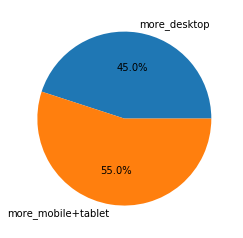

<Figure size 2160x2160 with 0 Axes>

In [28]:
print(journeys.groupby('more_desktop').size())
plt.pie(journeys.groupby('more_desktop').size(), labels=['more_desktop', 'more_mobile+tablet'], autopct='%1.1f%%')
plt.figure(figsize=(30,30))

### journey length - Don't forget this data is only in journeys of 1 page


EEK, be careful of frequency counts because need to include Occurences column for this. This is harder to interpret than it looks

In [29]:
journeys['page_seq_len'].describe()

count    267293.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: page_seq_len, dtype: float64

### Make a long df a row for each session

In [30]:
#make a smaller copy of data with only 2 cols ready to make it really looooong
slim = journeys[['Occurrences','final_page','page_seq_len', 'page_seq_len_NL', 'event_list_contains_start', 'count_search', 'contains_search_regex', 'page_list_NL_eval', 'Page_Seq_NL', 'page_seq_contains_start', 'page_seq_contains_service.gov.uk']].copy()
#repeat rows for each occurrence
journey_expanded =  slim.loc[slim.index.repeat(slim['Occurrences'])].copy()


In [31]:
journey_expanded['page_seq_len'].describe()

count    6945002.0
mean           1.0
std            0.0
min            1.0
25%            1.0
50%            1.0
75%            1.0
max            1.0
Name: page_seq_len, dtype: float64

In [32]:
journey_expanded['page_seq_len_NL'].describe()

count    6945002.0
mean           1.0
std            0.0
min            1.0
25%            1.0
50%            1.0
75%            1.0
max            1.0
Name: page_seq_len_NL, dtype: float64

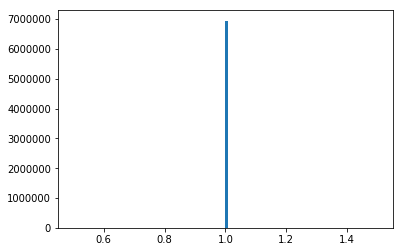

In [33]:
journey_expanded['page_seq_len'].hist(bins=122, grid=False)

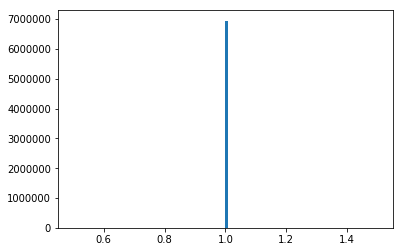

In [34]:
journey_expanded['page_seq_len_NL'].hist(bins=122, grid=False)

### Search counts

In [35]:
print("{}/{} ({}%) of journeys contain internal search in their path".format(journeys['contains_search_n'].sum(),
                                                                             journeys['Page_Seq_Occurrences'].sum(),
                                                                             journeys['contains_search_n'].sum()/journeys['Page_Seq_Occurrences'].sum()*100))

9096136/20430980747 (0.04452128907877141%) of journeys contain internal search in their path


In [36]:
data = []
for i in range(journeys['page_seq_len'].max()):
    df = journeys[journeys['page_seq_len']==i]
    if df['Page_Seq_Occurrences'].sum()>1:
            percent = round(df['contains_search_n'].sum()/df['Page_Seq_Occurrences'].sum()*100, 1)
            n = df['contains_search_n'].sum()
            denom = df['Page_Seq_Occurrences'].sum()
            p = percent/100
            variance = (p*(1-p))/denom
            data.append([i+1, n, denom, percent, variance])

search_seqlength = pd.DataFrame(data, columns=['length', 'n', 'denom','percent', 'variance'])

In [37]:
search_seqlength.iloc[10:27]

,length,n,denom,percent,variance


In [38]:
search_seqlength['length'].describe()

count     0
unique    0
Name: length, dtype: int64

In [39]:
journeys[journeys['contains_search_regex']==1].count_search.describe()

count    5514.000000
mean        1.077439
std         0.267311
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: count_search, dtype: float64

Text(0, 0.5, 'Number of journeys')

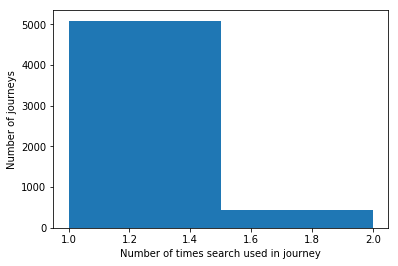

In [40]:
ax = journeys[journeys['contains_search_regex']==1].count_search.hist(bins=2, grid=False)
ax.set_xlabel("Number of times search used in journey")
ax.set_ylabel("Number of journeys")

Text(0, 0.5, 'Number of journeys')

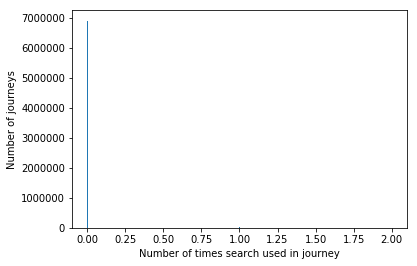

In [41]:
ax = journey_expanded.count_search.hist(bins=300, grid=False)
ax.set_xlabel("Number of times search used in journey")
ax.set_ylabel("Number of journeys")

(0, 312)

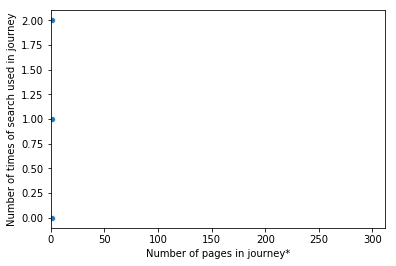

In [42]:
ax = sns.scatterplot(x="page_seq_len", y="count_search", data=journey_expanded)
ax.set_xlabel("Number of pages in journey*")
ax.set_ylabel("Number of times of search used in journey")
ax.set_xlim(0, 312)

In [43]:
# f, ax = plt.subplots(figsize=(6, 6))
# cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
# sns.kdeplot(journey_expanded.page_seq_len, journey_expanded.count_search, cmap=cmap, n_levels=1000, shade=True)
# ax.set_xlim(0, 100)
# ax.set_ylim(0, 10)

In [44]:
# f, ax = plt.subplots(figsize=(6, 6))
# sns.kdeplot(journey_expanded.page_seq_len, journey_expanded.count_search, ax=ax)
# sns.rugplot(journey_expanded.page_seq_len, color="g", ax=ax)
# sns.rugplot(journey_expanded.count_search, vertical=True, ax=ax)


In [45]:
# with sns.axes_style("white"):
#     sns.jointplot(x=journey_expanded.page_seq_len, y=journey_expanded.count_search, kind="hex", color="k")

### Most frequent pages

In [46]:
# lst_col = 'Page_Seq_NL'

# r = pd.DataFrame({
#       col:np.repeat(journey_expanded[col].values, journey_expanded[lst_col].str.len())
#       for col in journey_expanded.columns.drop(lst_col)}
#     ).assign(**{lst_col:np.concatenate(journey_expanded[lst_col].values)})[journey_expanded.columns]

In [47]:
journey_expanded['journey_type'] = journey_expanded.index

In [ ]:
journey_expanded.reset_index(inplace=True)
journey_expanded['journey'] = journey_expanded.index

In [ ]:
journey_expanded.head()

,index,Occurrences,final_page,page_seq_len,page_seq_len_NL,event_list_contains_start,count_search,contains_search_regex,page_list_NL_eval,Page_Seq_NL,page_seq_contains_start,page_seq_contains_service.gov.uk,journey_type,journey
0,89012,214,/government/publications/the-green-book-apprai...,1,1,0,0,0,[/government/publications/the-green-book-appra...,/government/publications/the-green-book-apprai...,0,1,89012,0
1,89012,214,/government/publications/the-green-book-apprai...,1,1,0,0,0,[/government/publications/the-green-book-appra...,/government/publications/the-green-book-apprai...,0,1,89012,1
2,89012,214,/government/publications/the-green-book-apprai...,1,1,0,0,0,[/government/publications/the-green-book-appra...,/government/publications/the-green-book-apprai...,0,1,89012,2
3,89012,214,/government/publications/the-green-book-apprai...,1,1,0,0,0,[/government/publications/the-green-book-appra...,/government/publications/the-green-book-apprai...,0,1,89012,3
4,89012,214,/government/publications/the-green-book-apprai...,1,1,0,0,0,[/government/publications/the-green-book-appra...,/government/publications/the-green-book-apprai...,0,1,89012,4


In [ ]:
#this gives me a new row for every page in the no loop page list in the data which already has a row for every occurrence
#so now each row represents a single occurrence of that page within a journey

s = journey_expanded.apply(lambda x: pd.Series(x['page_list_NL_eval']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'page'
page_expanded = journey_expanded.join(s).copy()

In [ ]:
page_expanded.head()

In [ ]:
print("Total journeys = {} \nTotal NL journey types = {} \nMean number of journeys per journey type = {}".format(
    journey_expanded.shape[0],
    journey_expanded.Page_Seq_NL.nunique(),
    journey_expanded.shape[0]/journey_expanded.Page_Seq_NL.nunique()))

In [ ]:
print("Total journey made with loops = {} \nTotal journey types = {} \nTotal journey types without loops = {} \nTotal pages visited = {}".format(
    page_expanded.journey.nunique(),
    page_expanded.journey_type.nunique(),
    page_expanded.Page_Seq_NL.nunique(),
    page_expanded.shape[0]))

In [ ]:
total_page_visits = page_expanded.shape[0]

In [ ]:
page_expanded.groupby(['journey_type', 'journey']).size().describe()

In [ ]:
page_expanded.groupby([ 'journey']).size().describe()

Oh good, this is distribution of number of pages per journey and now matches journey_expanded['page_seq_len_NL'].describe()

In [ ]:
# So I don't want to have more than one row for a page if it appeared twice in a session.
# I think that's because we might expect pages to be viewed multiple times in a session for both the do-a-thing and chang-a-thing journeys
# So I'm going to drop duplicate rows for a page within the same journey

page_expanded_no_repeats = page_expanded.drop_duplicates(['journey', 'page']).copy()

In [ ]:
print("Total journey made with loops = {} \nTotal journey types = {} \nTotal journey types without loops = {} \nUnique pages visited = {}".format(
    page_expanded_no_repeats.journey.nunique(),
    page_expanded_no_repeats.journey_type.nunique(),
    page_expanded_no_repeats.Page_Seq_NL.nunique(),
    page_expanded_no_repeats.shape[0]))

In [ ]:
print("So there were {} pages that were visited at least once in a journey and won't be counted from now".format(
page_expanded.shape[0]-page_expanded_no_repeats.shape[0]))

In [ ]:
print("The mean number of visits to a single page in a journey ={}".format(
    total_page_visits/page_expanded_no_repeats.shape[0]))

In [ ]:
page_expanded.groupby(['journey', 'page']).size().describe()

Most journeys (>=75%) (without loops) only visit a page once. The average is 1.25 because a small number of jounreys visit a page many times

In [ ]:
page_expanded_no_repeats.groupby([ 'page']).size().describe()

In [ ]:
ax = page_expanded_no_repeats.groupby([ 'page']).size().hist(bins=200)
ax.set_yscale('log')

This is the distribution of number of journeys containing a page. Some pages are in lots of journeys (10000) and half of pages are only in one. The mean number of jounreys a page is in is 5.6. 

Theres a 2% of content in 80% of sessionz thing that defines mainstream for some people. Is it true?

In [ ]:
print("There are {} different pages".format(
    page_expanded_no_repeats.groupby([ 'page']).size().sort_values(ascending=False).shape[0]))

unique_pages = page_expanded_no_repeats.groupby([ 'page']).size().sort_values(ascending=False).shape[0]

In [ ]:
page_expanded_no_repeats.groupby([ 'page']).size().sort_values(ascending=False).head(20)

In [ ]:
top_2_percent = page_expanded_no_repeats.groupby([ 'page']).size().nlargest(int(unique_pages * 0.02))

In [ ]:
print("the top 2% of pages are visited in {}% of journeys".format(
    top_2_percent.sum()/page_expanded_no_repeats.groupby([ 'page']).size().sum()))

In [ ]:
percent = 0.13

print("the top {}% of pages are visited in {}% of journeys".format(
    percent * 100,
    page_expanded_no_repeats.groupby([ 'page']).size().nlargest(int(unique_pages * percent)).sum()/page_expanded_no_repeats.groupby([ 'page']).size().sum()))

In [ ]:
data = []
for i in np.arange(0.0, 1.0, 0.001):
    percent_of_pages = i*100
    n = page_expanded_no_repeats.groupby([ 'page']).size().nlargest(int(unique_pages * i)).sum()
    percent_of_journeys = n/page_expanded_no_repeats.groupby([ 'page']).size().sum()*100
    data.append([percent_of_pages, n, percent_of_journeys])

journey_to_content_relationship = pd.DataFrame(data, columns=['percent_of_pages', 'number_of_pages', 'percent_of_journeys'])

In [ ]:
ax = sns.scatterplot(x="percent_of_pages", y="percent_of_journeys", data=journey_to_content_relationship)
ax.set_xlabel("Percent of pages in data")
ax.set_ylabel("Percent of journeys containing these pages")

# Create a Rectangle patch
rect = patches.Rectangle((0,0),2,84,linewidth=1,edgecolor='r',facecolor='red', fill=True, alpha=0.5)
rect2 = patches.Rectangle((0,0),13,95,linewidth=1,edgecolor='blue',facecolor='blue', fill=True, alpha=0.05)
# Add the patch to the Axes
ax.add_patch(rect)
ax.add_patch(rect2)

In [ ]:


ax = sns.scatterplot(x="percent_of_pages", y="percent_of_journeys", data=journey_to_content_relationship)
ax.set_xlabel("Percent of pages in data")
ax.set_ylabel("Percent of journeys containing these pages")
ax.set_xlim(0, 20)

# Create a Rectangle patch
rect = patches.Rectangle((0,0),2,84,linewidth=1,edgecolor='r',facecolor='red', fill=True, alpha=0.5)

# Add the patch to the Axes
ax.add_patch(rect)

### journeys containing start pages

In [ ]:
journey_expanded.event_list_contains_start.value_counts()

In [ ]:
journey_expanded.event_list_contains_start.value_counts(normalize=True)

In [ ]:
journey_expanded.page_seq_contains_start.value_counts()

In [ ]:
journey_expanded.page_seq_contains_start.value_counts(normalize=True)

In [ ]:

plt.pie(journey_expanded.event_list_contains_start.value_counts(), labels=['start not in event list', 'the word start is in event list'], autopct='%1.1f%%')
plt.figure(figsize=(30,30))

In [ ]:

plt.pie(journey_expanded.page_seq_contains_start.value_counts(), labels=['start not in journey sequence', 'the word start is in journey sequence'], autopct='%1.1f%%')
plt.figure(figsize=(30,30))

### journeys containing 'service.gov.uk'

In [ ]:

# plt.pie(journey_expanded['page_seq_contains_service.gov.uk'].value_counts(), labels=['not in journey sequence', 'service.gov.uk is in journey sequence'], autopct='%1.1f%%')
plt.pie(journey_expanded['page_seq_contains_service.gov.uk'].value_counts(), autopct='%1.1f%%')

plt.figure(figsize=(30,30))

### End page

In [ ]:
journeys['final_page'].nunique()

In [ ]:
journeys.shape

#### most frequent end pages

In [ ]:
journey_expanded.groupby('final_page').size().describe()

In [ ]:
journey_expanded.groupby('final_page').size().sort_values(ascending=False).iloc[0:50]

#### Most number of 'ways' of getting there

In [ ]:
print("On average there are {} journeys per exit page; ways of getting there".format(journeys.shape[0]/journeys['final_page'].nunique()))

This is obviously calculated incorrectly as there is only one way of getting to an exit page on a one-page journey!

In [ ]:
unique_page_sequences = journeys.drop_duplicates('Page_Seq_NL')

In [ ]:
unique_page_sequences.groupby('final_page').size().describe()

In [ ]:
pd.set_option('display.max_colwidth', -1)
# unique_page_sequences[unique_page_sequences['final_page']=='/vehicle-tax'].head()

In [ ]:
unique_page_sequences.groupby('final_page').size().describe()

In [ ]:
groupby_percent(journeys, 'final_page_type', 'Page_Seq_NL')

#### Final interaction with GOV.UK

In [ ]:
pd.set_option('display.max_colwidth', -1)
journeys[journeys.final_interaction.str.contains('start')]

In [ ]:
#make a smaller copy of data with only 2 cols ready to make it really looooong
slim = journeys[['Occurrences','exit_to_assessed_service']].copy()
#repeat rows for each occurrence
journey_expanded2 =  slim.loc[slim.index.repeat(slim['Occurrences'])]

In [ ]:
journey_expanded2['exit_to_assessed_service'].value_counts(normalize=True)

In [ ]:
plt.pie(journey_expanded2['exit_to_assessed_service'].value_counts(), labels=['did not exit to an assessed service', 'exited to an assessed service'], autopct='%1.1f%%')

In [ ]:
journeys['final_external_link_service'] = np.where(journeys.final_interaction.str.contains(r'<External Link Clicked<:(.*)', expand=False)

In [ ]:
groupby_percent(journeys, 'final_interaction_type', 'PageSequence', figsize=(5, 10))

In [ ]:
journeys.groupby('final_interaction_type').size().sort_values(ascending=False)

In [ ]:
print(journeys[journeys['final_interaction']=='PAGE<:<NULL<:<NULL'].shape)

print("{} out of {} ({}%) journeys ended in a page hit".format(journeys[journeys['final_interaction']=='PAGE<:<NULL<:<NULL'].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction']=='PAGE<:<NULL<:<NULL'].shape[0]/journeys.shape[0]*100))

In [ ]:
print(journeys[journeys['final_interaction'].str.startswith('EVENT<:<External Link Clicked')].shape)

print("{} out of {} ({}%) journeys ended in an external link clicked".format(journeys[journeys['final_interaction'].str.startswith('EVENT<:<External Link Clicked')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.startswith('EVENT<:<External Link Clicked')].shape[0]/journeys.shape[0]*100))

In [ ]:
print(journeys[journeys['final_interaction'].str.startswith('EVENT<:<External Link Clicked')].shape)

print("{} out of {} ({}%) journeys ended in an specialist external link clicked".format(journeys[journeys['final_interaction'].str.startswith('EVENT<:<Specialist-external-link')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.startswith('EVENT<:<Specialist-external-link')].shape[0]/journeys.shape[0]*100))

In [ ]:
print("{} out of {} ({}%) journeys ended in aSpecialist-external-link".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<Specialist-external-link')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<Specialist-external-link')].shape[0]/journeys.shape[0]*100))

In [ ]:
print("{} out of {} ({}%) journeys ended in an download link clicked".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<Download Link Clicked')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<Download Link Clicked')].shape[0]/journeys.shape[0]*100))

In [ ]:
print("{} out of {} ({}%) journeys ended in a  contents clicked".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<contentsClicked<')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<contentsClicked<')].shape[0]/journeys.shape[0]*100))

In [ ]:
print("{} out of {} ({}%) journeys ended in a breadcrumbClicked".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<breadcrumbClicked<')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<breadcrumbClicked<')].shape[0]/journeys.shape[0]*100))

In [ ]:
print("{} out of {} ({}%) journeys ended in a JavaScript Error".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<JavaScript Error<')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<JavaScript Error<')].shape[0]/journeys.shape[0]*100))

In [ ]:
print("{} out of {} ({}%) journeys ended in a Simple Smart Answer".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<Simple Smart Answer<')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<Simple Smart Answer<')].shape[0]/journeys.shape[0]*100))

In [ ]:
print("{} out of {} ({}%) journeys ended in a Smart Answer".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<Smart Answer<')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<Smart Answer<')].shape[0]/journeys.shape[0]*100))

In [ ]:
print("{} out of {} ({}%) journeys ended in a social media".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<social media<')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<social media<')].shape[0]/journeys.shape[0]*100))

In [ ]:
print("{} out of {} ({}%) journeys ended in yesNoFeedbackForm".format(journeys[journeys['final_interaction'].str.contains('EVENT<:<yesNoFeedbackForm<')].shape[0], 
                                                        journeys.shape[0],
                                                        journeys[journeys['final_interaction'].str.contains('EVENT<:<yesNoFeedbackForm<')].shape[0]/journeys.shape[0]*100))

### final page type

In [ ]:
journeys['final_page_type'] = 'other'
journeys.loc[journeys['final_page'].str.contains('/government/publications/', 'final_page_type')] = 'government_publication'
journeys.loc[journeys['final_page'].str.contains('log-in', 'final_page_type')] = 'login'
journeys.loc[journeys['final_page'].str.contains('sign-in', 'final_page_type')] = 'login'
journeys.loc[journeys['final_page'].str.contains('login', 'final_page_type')] = 'login'
journeys.loc[journeys['final_page'].str.contains('check', 'final_page_type')] = 'check'
journeys.loc[journeys['final_page'].str.contains('apply', 'final_page_type')] = 'apply'
journeys.loc[journeys['final_page'].str.contains('contact', 'final_page_type')] = 'contact/enquiries'
journeys.loc[journeys['final_page'].str.contains('enquiries', 'final_page_type')] = 'contact/enquiries'
journeys.loc[journeys['final_page'].str.contains(r'get-.*-information.*', 'final_page_type')] = 'get_information'
journeys.loc[journeys['final_page'].str.contains('send', 'final_page_type')] = 'send'
journeys.loc[journeys['final_page'].str.contains('find', 'final_page_type')] = 'find'
journeys.loc[journeys['final_page'].str.contains('calculat', 'final_page_type')] = 'calculate/calculator'
journeys.loc[journeys['final_page'].str.contains('order', 'final_page_type')] = 'order'
journeys.loc[journeys['final_page'].str.contains('manage', 'final_page_type')] = 'manage'
journeys.loc[journeys['final_page'].str.contains('update', 'final_page_type')] = 'update'
journeys.loc[journeys['final_page'].str.contains('eligibility', 'final_page_type')] = 'eligibility'
journeys.loc[journeys['final_page'].str.contains('estimate', 'final_page_type')] = 'estimate'
journeys.loc[journeys['final_page'].str.contains('renew', 'final_page_type')] = 'renew'
journeys.loc[journeys['final_page'].str.contains('pay', 'final_page_type')] = 'pay'
journeys.loc[journeys['final_page'].str.contains('claim', 'final_page_type')] = 'claim'
journeys.loc[journeys['final_page'].str.contains('change', 'final_page_type')] = 'change'

In [ ]:
journeys.groupby('final_page_type').size()